The Loan Dataset from Prosper 


Dataset exploration by LOKKAN CHENG

Preliminary Wrangling
Overview of this dataset:

This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

The data dictionary docunment explains the variables in the data set.



In [1]:
# first we will import the packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_style('darkgrid')

%matplotlib inline

In [2]:
# read the prosperLoanData csv file
df1 = pd.read_csv('prosperLoanData.csv')

In [3]:
# Lets check the colums and data types for each 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
#Check the shape of the dataset and we noticed that there is 81 columns and 113937 rows

df1.shape

(113937, 81)

In [5]:
 #check the head and tail of the dataset
df1.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
df1.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


#Lets clearly print out the columns of the dataset so we can take a closer look at what information we need for the exploration

In [7]:
df1.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [8]:
for i, v in enumerate(df1.columns):
    print(i, v , type(df1[v][1]))

0 ListingKey <class 'str'>
1 ListingNumber <class 'numpy.int64'>
2 ListingCreationDate <class 'str'>
3 CreditGrade <class 'float'>
4 Term <class 'numpy.int64'>
5 LoanStatus <class 'str'>
6 ClosedDate <class 'float'>
7 BorrowerAPR <class 'numpy.float64'>
8 BorrowerRate <class 'numpy.float64'>
9 LenderYield <class 'numpy.float64'>
10 EstimatedEffectiveYield <class 'numpy.float64'>
11 EstimatedLoss <class 'numpy.float64'>
12 EstimatedReturn <class 'numpy.float64'>
13 ProsperRating (numeric) <class 'numpy.float64'>
14 ProsperRating (Alpha) <class 'str'>
15 ProsperScore <class 'numpy.float64'>
16 ListingCategory (numeric) <class 'numpy.int64'>
17 BorrowerState <class 'str'>
18 Occupation <class 'str'>
19 EmploymentStatus <class 'str'>
20 EmploymentStatusDuration <class 'numpy.float64'>
21 IsBorrowerHomeowner <class 'numpy.bool_'>
22 CurrentlyInGroup <class 'numpy.bool_'>
23 GroupKey <class 'float'>
24 DateCreditPulled <class 'str'>
25 CreditScoreRangeLower <class 'numpy.float64'>
26 CreditS

In [9]:
#check the unique number in the dataset
df1.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
CreditGrade                         8
Term                                3
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 81, dtype: int64

In [10]:
#check how many NAN
df1.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [11]:
#check the sum of the duplicated 
df1.duplicated().sum()

0

In [12]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
113932    False
113933    False
113934    False
113935    False
113936    False
Length: 113937, dtype: bool

In [13]:
df1.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


What is the structure of your dataset?

      This dataset contains 113937 rows and 81 columns. The rows represents the loan and the 81 represents the variables in the       dataset.

What is/are the main feature(s) of interest in your dataset?

      There are some columns that I might not need for the data analysis below. but the main features that interested me in    this dataset is to figure out what columns i need and what features are needed.

What features in the dataset do you think will help support your investigatation into your feature(s) of interest?

  Looking at the dataset, i believe these below will help me to support my investigation into my features of interest:

   Borrower Monthly Payment,
   Borrower Occupation, 
   Borrower State, 
   Borrower Employment Status , 
   Borrower Rate, Borrower APR,       
   Prosper Score, 
   Loan Amount.

Univariate Exploration

In [14]:
#lets make a copy of the orginal data so we can still have access to it later
df2 = df1.copy()

In [15]:
basecolor = sn.color_palette()[0]


In [16]:
# We can make a barplot graph so we can clearly to check what are those missing values column.

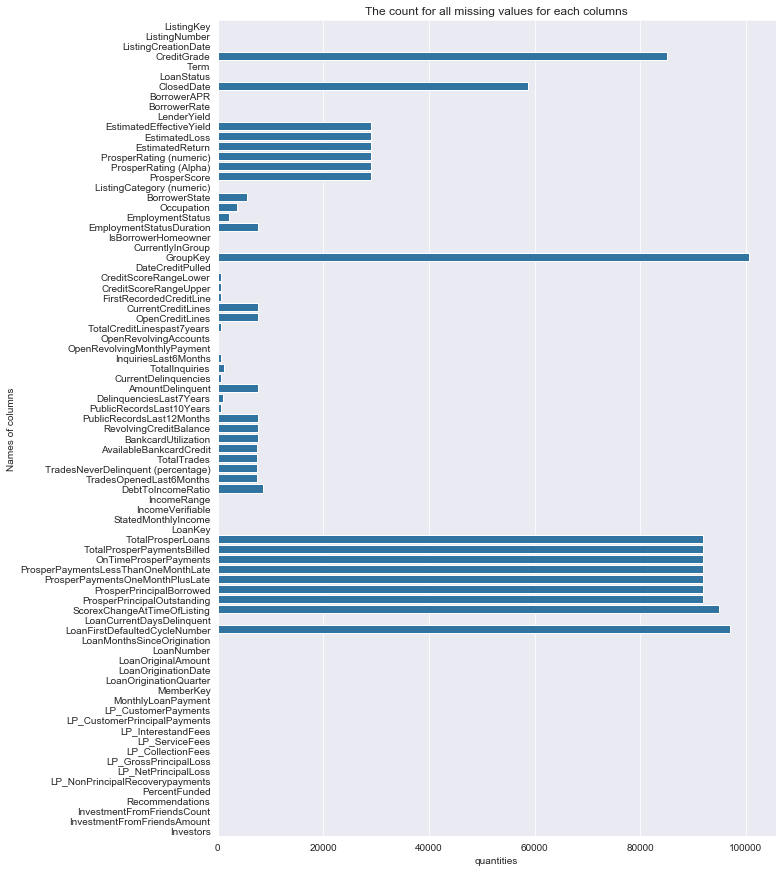

In [17]:
plt.figure(figsize = [10,15])
na_counts = df2.isna().sum()
sn.barplot(na_counts, na_counts.index.values, color = basecolor);
plt.title('The count for all missing values for each columns')
plt.xlabel('quantities')
plt.ylabel('Names of columns')
plt.show()


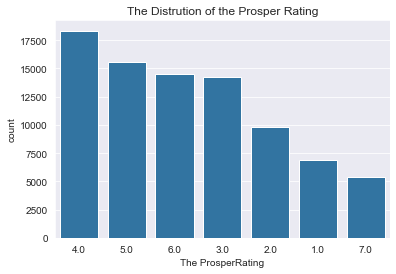

In [18]:
#1  The Prosper rating

order = df2['ProsperRating (numeric)'].value_counts().index
sn.countplot(data = df2 , x = 'ProsperRating (numeric)' , color =basecolor, order = order); 

plt.title('The Distrution of the Prosper Rating')
plt.xlabel('The ProsperRating')
plt.ylabel('count')
plt.show()

We can see that 4 is the highest Prosper Rating and 7 is the lowest Prosper Rating.

More than 50% of people are employed and the lowest three are retired,part-time and not-employed.

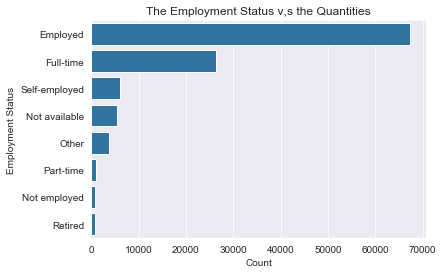

In [19]:
#2. The Employment Status

order2 = df2['EmploymentStatus'].value_counts().index
sn.countplot(data = df2 , y = 'EmploymentStatus' , color =basecolor, order = order2); 

plt.title('The Employment Status v,s the Quantities')
plt.xlabel('Count')
plt.ylabel('Employment Status')
plt.show()

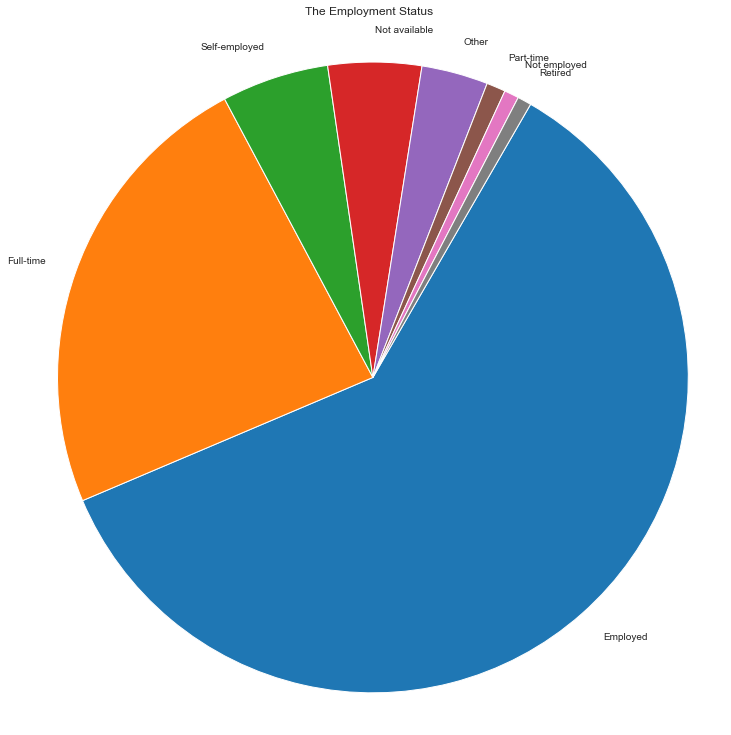

In [20]:

plt.figure(figsize = [15,13])
counts = df2['EmploymentStatus'].value_counts()
plt.pie(counts, labels = counts.index, startangle = 60,
        counterclock = False);
plt.axis('square')
plt.title('The Employment Status ')
plt.show()

In [21]:
#3. The Status for each type of loan


There are more than 50000 loans currently active and only less than 40000 loans are completed. Also, just a little bit over 10000 of loans are charged off.

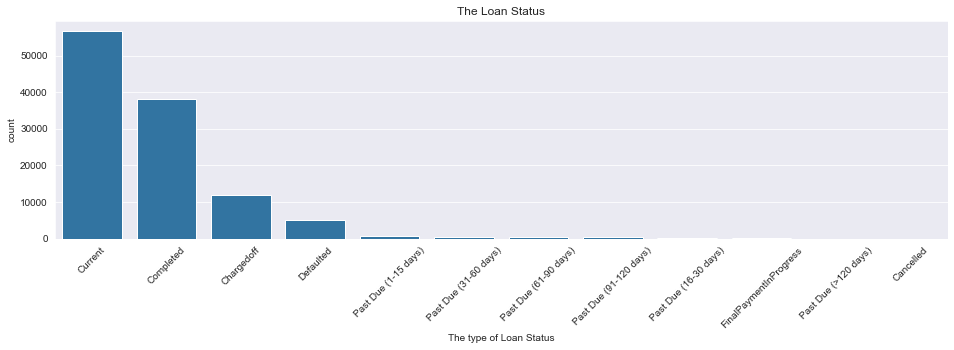

In [22]:
plt.figure(figsize = [16,4])
order3 = df2['LoanStatus'].value_counts().index
sn.countplot(data = df2 , x = 'LoanStatus' , color =basecolor , order=order3);
plt.xticks(rotation = 45);
plt.title('The Loan Status')
plt.xlabel('The type of Loan Status')
plt.ylabel('count')
plt.show()

#4 The Borrower Rate

In [23]:
df2['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

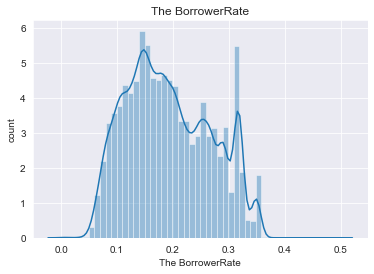

In [24]:
sn.distplot(df2['BorrowerRate']);
plt.title('The BorrowerRate')
plt.xlabel('The BorrowerRate')
plt.ylabel('count')
plt.show()

The mean of the borrwer rate is 0.18. Most people their BorrowerRate is between 0.1 and 0.2

#5 The Borrower APR

In [25]:
df2['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

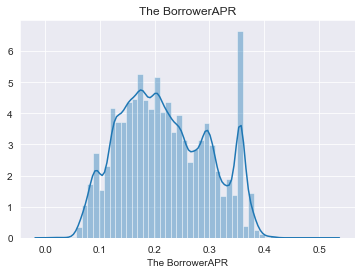

In [26]:
sn.distplot(df2['BorrowerAPR']);
plt.title('The BorrowerAPR')
plt.xlabel('The BorrowerAPR')

plt.show()

The highest Borrower APR is 0.36 while the mean borrower APR is 0.20

What are the top 5 and bottom 5 occupation type of the borrowerw? 

In [62]:
df2['Occupation'].value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

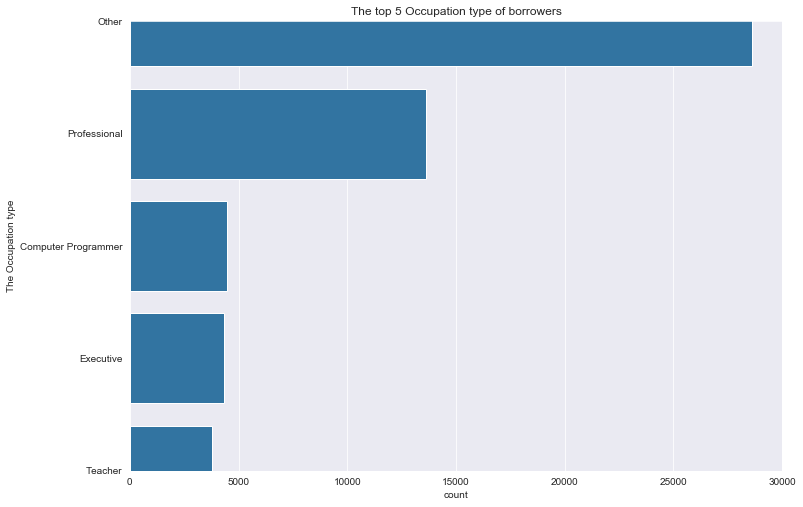

In [87]:

plt.figure(figsize = [11.69,8.27])
order4 = df2['Occupation'].value_counts().index

ax=sn.countplot(data = df2 , y = 'Occupation' , color =basecolor , order = order4);
ax= ax.set(xlim=(0,30000),ylim=(4, 0))
plt.title('The top 5 Occupation type of borrowers')
plt.xlabel('count')
plt.ylabel('The Occupation type')
plt.show()

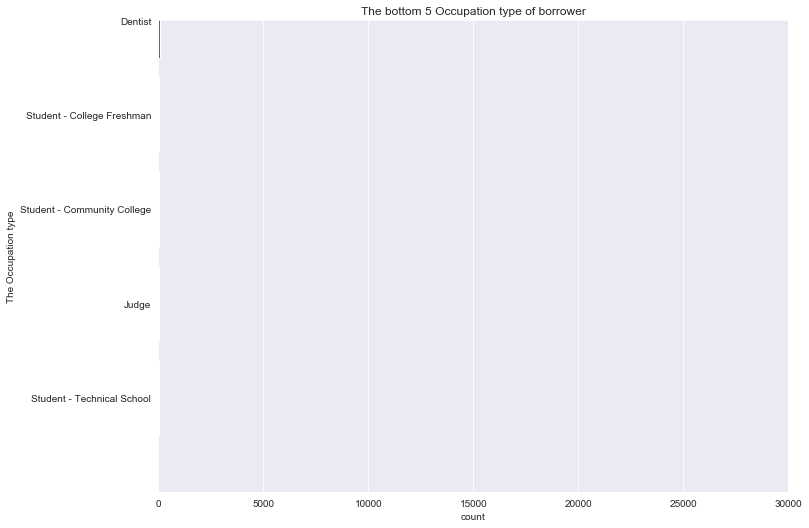

In [88]:
plt.figure(figsize = [11.29,8.67])
order4 = df2['Occupation'].value_counts().index

ax=sn.countplot(data = df2 , y = 'Occupation' , color =basecolor , order = order4);
ax= ax.set(xlim=(0,30000),ylim=(67, 62))
plt.title('The bottom 5 Occupation type of borrower')
plt.xlabel('count')
plt.ylabel('The Occupation type')
plt.show()

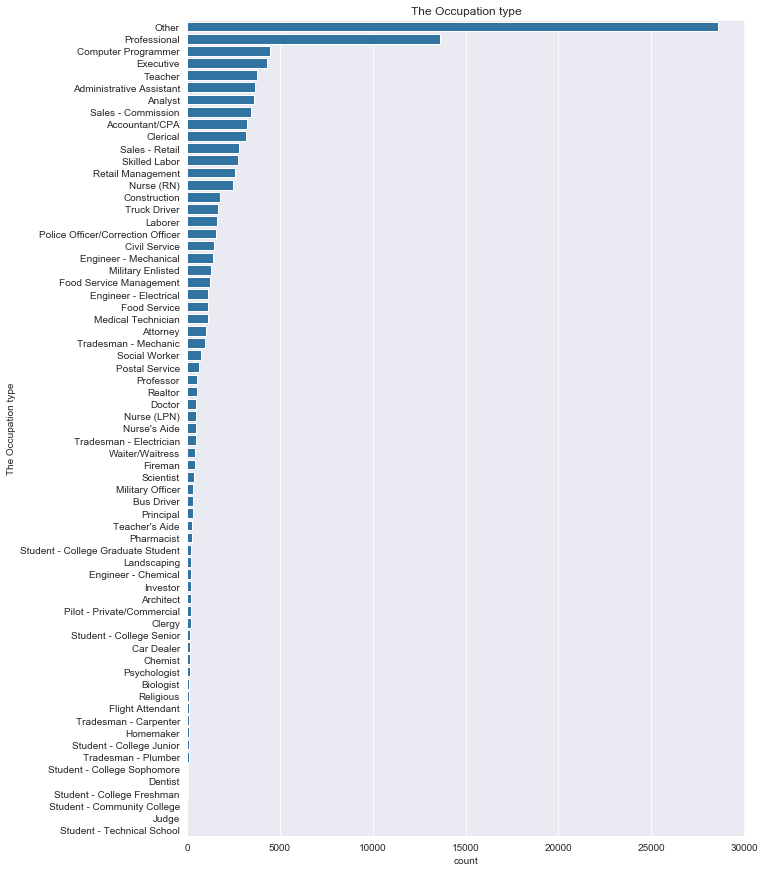

In [60]:
plt.figure(figsize = [10,15])
order4 = df2['Occupation'].value_counts().index
sn.countplot(data = df2 , y = 'Occupation' , color =basecolor , order = order4);
plt.title('The Occupation type')
plt.xlabel('count')
plt.ylabel('The Occupation type')
plt.show()

The highest occupation type for the borrower is others and then Professional, Computer Programmer, Executive.

Is the borrower a home owner? Actually about 50% of the borrower a home owner

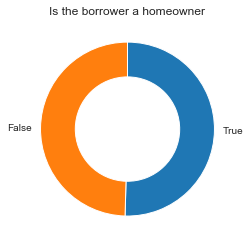

In [28]:
counts = df2['IsBorrowerHomeowner'].value_counts()
plt.pie(counts, labels = counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.title('Is the borrower a homeowner')

plt.show()

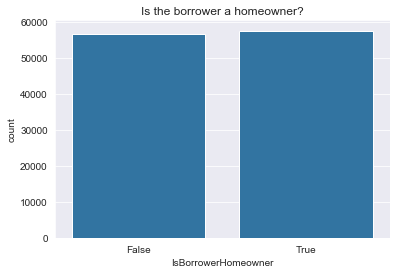

In [29]:
sn.countplot(data = df2 , x = 'IsBorrowerHomeowner' , color =basecolor);
plt.title('Is the borrower a homeowner?')

plt.show()

About 50% of the borrower a home owner

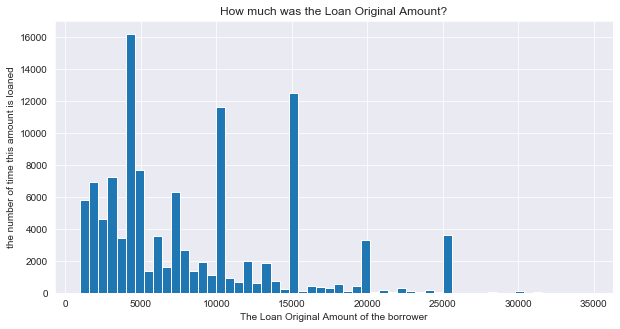

In [30]:
#8 Loan Original Amount What is their Loan Original Amount?
plt.figure(figsize = [10,5])
bins = np.arange(df2['LoanOriginalAmount'].min(), df2['LoanOriginalAmount'].max(), 600)
plt.hist(data = df2, x = 'LoanOriginalAmount', bins = bins);
plt.title('How much was the Loan Original Amount?')
plt.xlabel('The Loan Original Amount of the borrower')
plt.ylabel ('the number of time this amount is loaned')
plt.show()

4500, 10500 and 15000 are the most loan amount that borrowed by the borrower

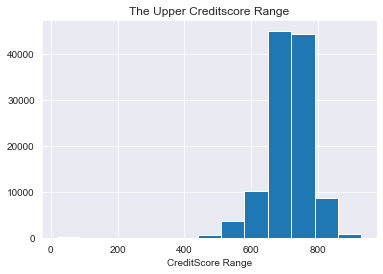

In [31]:
#9 Credit score Range
bins = np.arange(df2['CreditScoreRangeUpper'].min(),df2['CreditScoreRangeUpper'].max() + 70, 70)
plt.hist(data = df2 , x = 'CreditScoreRangeUpper' , bins = bins);
plt.title('The Upper Creditscore Range')
plt.xlabel('CreditScore Range')

plt.show()

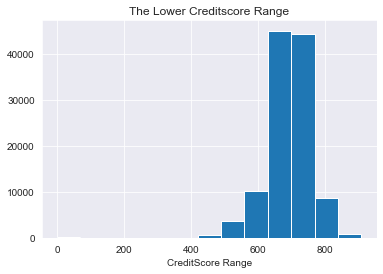

In [32]:
bins1 = np.arange(df2['CreditScoreRangeLower'].min(),df2['CreditScoreRangeLower'].max() + 70, 70)
plt.hist(data = df2 , x = 'CreditScoreRangeLower' , bins = bins1);
plt.title('The Lower Creditscore Range')
plt.xlabel('CreditScore Range')

plt.show()

Based on this information, the maximum credit score is 700 and the mean credit score is approximataly between 650-700

Which states of people borrow the most?  People who live in California actually borrow the loan the most. New York, Texas and Florida are the next highest.

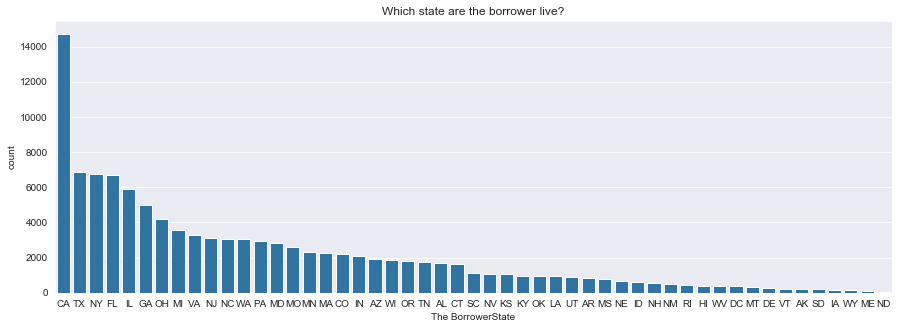

In [33]:
#10 The borrower State,  Where are these Borrower live?

plt.figure(figsize=(15,5))
order5 = df2['BorrowerState'].value_counts().index
sn.countplot(data = df2 , x = 'BorrowerState' , color =basecolor , order = order5);
plt.title('Which state are the borrower live?')
plt.xlabel('The BorrowerState')

plt.show()

People who live in California borrow the loan the most. New York, Texas and Florida are the next highest.



Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Based on the plots above, I noticed that most of them are normal distrubuted. For example, the one i just plotted about the states of Borrower. I dont think that transformation is neccessary at this moment so I didnt perform any transformation.



Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Accoording to the plots above, the original loan amount is a multimodel where it probability distribution has more than one peak.


Bivariate Exploration

In [34]:
# Convert the LoanOriginationDate column to year, month and dat
df2['LoanOriginationDate']= pd.to_datetime(df2['LoanOriginationDate'])

In [35]:
df2['OriginationYear'] = df2['LoanOriginationDate'].dt.year
df2['OriginationMonth'] = df2['LoanOriginationDate'].dt.month
df2['OriginationDay'] = df2['LoanOriginationDate'].dt.day

df2.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,OriginationYear,OriginationMonth,OriginationDay
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,1.0,0,0,0.0,258,2007,9,12
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,1.0,0,0,0.0,1,2014,3,3
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,1.0,0,0,0.0,41,2007,1,17
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,1.0,0,0,0.0,158,2012,11,1
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,1.0,0,0,0.0,20,2013,9,20


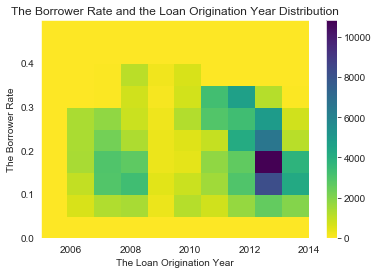

In [36]:
#1  Borrower Rate v.s Loan Origination Year
plt.hist2d(data = df2 , y= 'BorrowerRate' , x = 'OriginationYear' , cmap = 'viridis_r'  );
plt.colorbar()
plt.title('The Borrower Rate and the Loan Origination Year Distribution')
plt.ylabel('The Borrower Rate')
plt.xlabel('The Loan Origination Year')
plt.show()

Looking at the Distribution above, we can see that the borrower rate are increasing years by years and then decrease.


The borrower rate are increasing years by year. Before 2013, the borrowed loan amounts were not that high compare to 2014. If we look at the regplot, we can see that the line is increasing over the year.

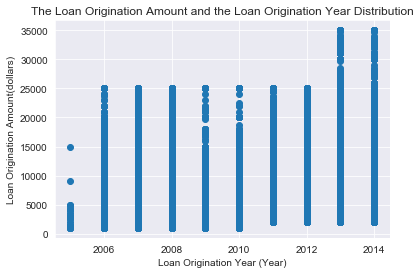

In [89]:
#2  Loan Origination year v.s Loan Origination Amount

plt.scatter(data = df2 , x= 'OriginationYear' , y = 'LoanOriginalAmount');

plt.title('The Loan Origination Amount and the Loan Origination Year Distribution')
plt.xlabel('Loan Origination Year (Year)')
plt.ylabel('Loan Origination Amount(dollars)')
plt.show()

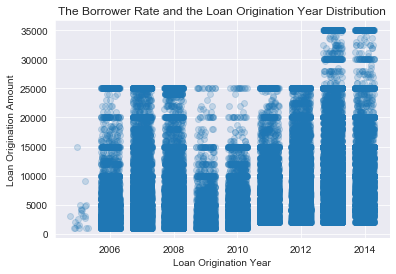

In [38]:

sn.regplot(data = df2 , x= 'OriginationYear' , y = 'LoanOriginalAmount' 
           , fit_reg = False ,x_jitter = 0.3 , scatter_kws = {'alpha' : 1/5});
plt.title('The Borrower Rate and the Loan Origination Year Distribution')
plt.xlabel('Loan Origination Year')
plt.ylabel('Loan Origination Amount')
plt.show()

It looks like that before 2013, the borrowed loan amounts were not that high compare to 2014. If we look at the regplot, we can see that the line is increasing over the year.

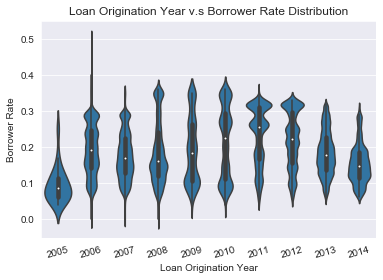

In [39]:
#3 Loan Origination Year v.s Borrower Rate

sn.violinplot(data = df2, x = 'OriginationYear', y = 'BorrowerRate',color = basecolor);
plt.xticks(rotation = 15);
plt.title('Loan Origination Year v.s Borrower Rate Distribution')
plt.xlabel('Loan Origination Year')
plt.ylabel('Borrower Rate')
plt.show()

The highest borrower rate were in 2006,2008, 2009 and 2010

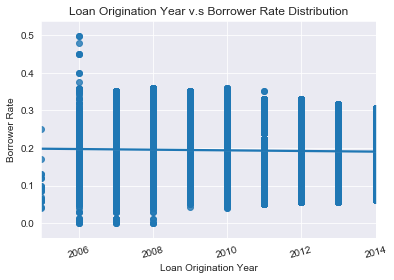

In [40]:
sn.regplot(data = df2, x = 'OriginationYear', y = 'BorrowerRate',color = basecolor);
plt.xticks(rotation = 15);
plt.title('Loan Origination Year v.s Borrower Rate Distribution')
plt.xlabel('Loan Origination Year')
plt.ylabel('Borrower Rate')
plt.show()

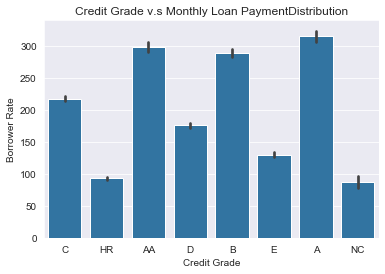

In [41]:
#4 Credit Grade v.s Monthly Loan Payment

sn.barplot(data = df2, x = 'CreditGrade', y = 'MonthlyLoanPayment',color = basecolor);
plt.title('Credit Grade v.s Monthly Loan PaymentDistribution')
plt.xlabel('Credit Grade')
plt.ylabel('Borrower Rate')
plt.show()

The highest monthly loan payment is the people his/her credit grade is A and then followed by AA and B. The NC is the lowest credit grade.

The borrowers who income is $100,000 have the lowest borrower rate. The borrowers who are not employed have the highest borrower APR and then the second highest borrower APR are the borrowers who income range are below 24,999

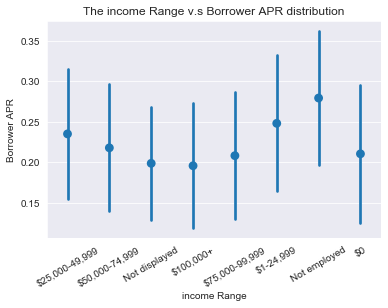

In [42]:
#5 Income Range v.s Borrower APR
sn.pointplot(data = df2, x = 'IncomeRange', y = 'BorrowerAPR', linestyles = '' , ci = 'sd');
plt.xticks(rotation = 30);
plt.title('The income Range v.s Borrower APR distribution')
plt.xlabel('income Range')
plt.ylabel('Borrower APR')
plt.show()

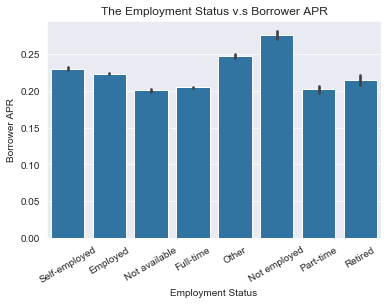

In [43]:
#6 Employment Status v.s Borrower APR
sn.barplot(data = df2, x = 'EmploymentStatus', y = 'BorrowerAPR',color = basecolor );
plt.xticks(rotation = 30)
plt.title('The Employment Status v.s Borrower APR')
plt.xlabel('Employment Status')
plt.ylabel('Borrower APR')
plt.show()

Non employed borrower are the group of people who has the highest borower APR. We can see this inofmration in the plot in #5
Income Range v.s Borrower APR. The people who are non employed or make less than 24999 have the highest Borrower APR rate.


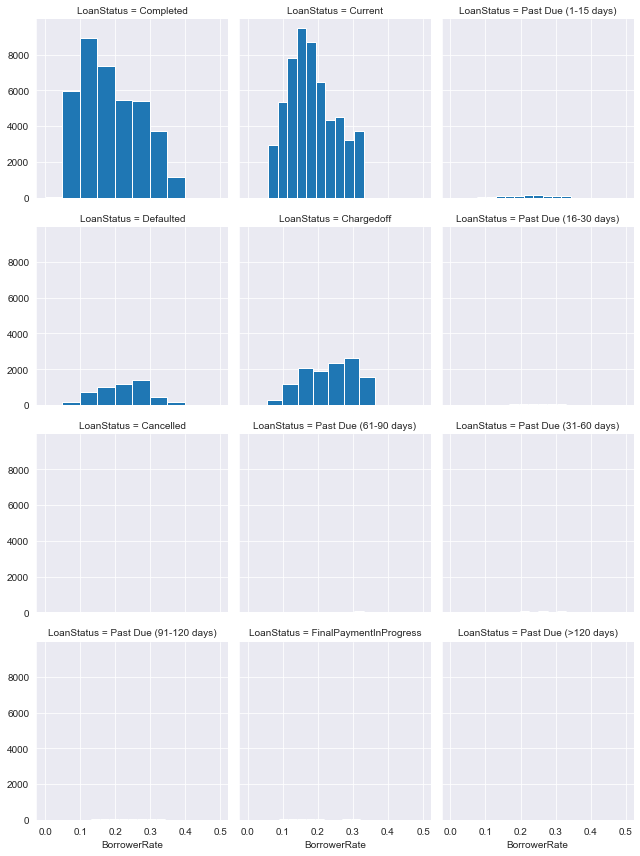

In [44]:
#7 The Borrower Rate v.s Loan Status
bins = np.arange(0.3 , 0.42 , 0.03)
x = sn.FacetGrid(data = df2 , col = 'LoanStatus' , col_wrap =3);
x.map(plt.hist , 'BorrowerRate');


The current active loan has the highest borrower rate and then the second highest one is the completed one

In [45]:
#8  Employment Status v.s Prosper Score

ct= df2.groupby([ 'EmploymentStatus' ,'ProsperScore' ]).size()
ct1 = ct.reset_index(name= 'count')
print (ct1)

   EmploymentStatus  ProsperScore  count
0          Employed           1.0    533
1          Employed           2.0   4353
2          Employed           3.0   5947
3          Employed           4.0  10181
4          Employed           5.0   7807
..              ...           ...    ...
69    Self-employed           7.0    287
70    Self-employed           8.0    223
71    Self-employed           9.0    126
72    Self-employed          10.0     83
73    Self-employed          11.0     43

[74 rows x 3 columns]


In [46]:
# use PIVOT. 
ct1 = ct1.pivot(index = 'EmploymentStatus' , columns = 'ProsperScore' , values = 'count')
ct1

ProsperScore,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
EmploymentStatus,,,,,,,,,,,
Employed,533.0,4353.0,5947.0,10181.0,7807.0,10130.0,8806.0,9710.0,4704.0,3774.0,1365.0
Full-time,199.0,245.0,331.0,477.0,711.0,883.0,922.0,1575.0,1811.0,759.0,14.0
Not employed,4.0,52.0,76.0,106.0,104.0,118.0,88.0,71.0,27.0,3.0,NaN
Other,37.0,374.0,510.0,759.0,517.0,574.0,408.0,374.0,126.0,93.0,34.0
Part-time,6.0,9.0,9.0,19.0,32.0,24.0,33.0,51.0,59.0,14.0,NaN
Retired,13.0,27.0,19.0,32.0,40.0,52.0,53.0,49.0,58.0,24.0,NaN
Self-employed,200.0,706.0,750.0,1021.0,602.0,497.0,287.0,223.0,126.0,83.0,43.0


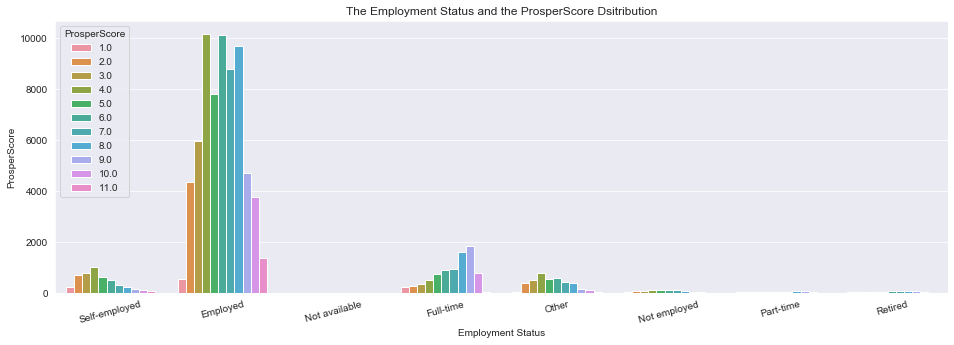

In [47]:

plt.figure(figsize = [16,5])
ax = sn.countplot(data = df2, x = 'EmploymentStatus' , hue = 'ProsperScore');
plt.xticks(rotation = 15);


plt.title('The Employment Status and the ProsperScore Dsitribution')
plt.xlabel('Employment Status')
plt.ylabel('ProsperScore')
plt.show()


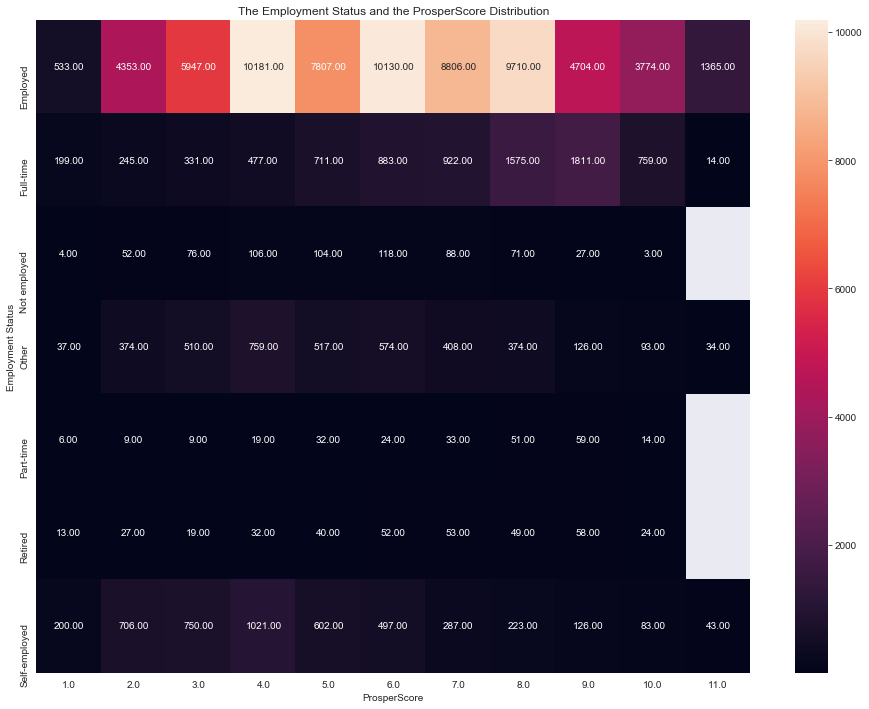

In [48]:
plt.figure(figsize = [16,12])
sn.heatmap(ct1 , annot =True , fmt = '.2f');
plt.title('The Employment Status and the ProsperScore Distribution')
plt.xlabel('ProsperScore')
plt.ylabel('Employment Status')
plt.show()

The Prosper rating is highest in the borrower who are employed. It looks like that the different between the Prosper Rate and Employement status is large.

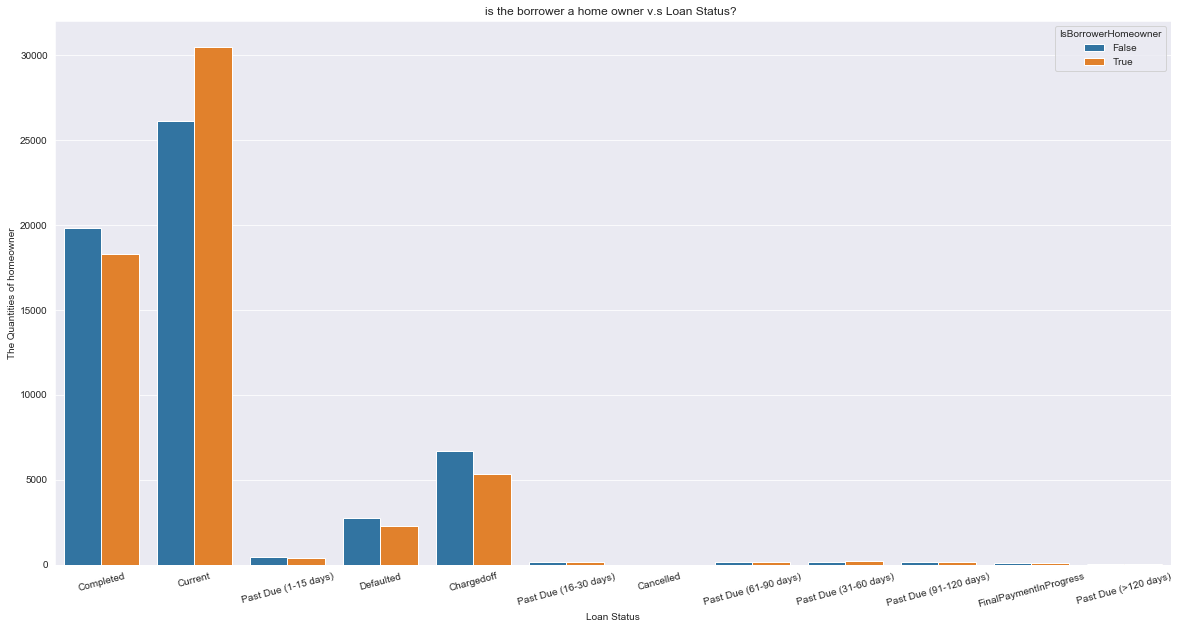

In [49]:
#9 is the borrower a home owner and whats the Loan Status?
plt.figure(figsize = [20,10])
ax = sn.countplot(data = df2, x = 'LoanStatus' , hue = 'IsBorrowerHomeowner');
plt.xticks(rotation = 15);
plt.title('is the borrower a home owner v.s Loan Status? ')
plt.xlabel('Loan Status')
plt.ylabel('The Quantities of homeowner')
plt.show()

The borrowers who have the active loans are the highest and they are home owner. 

Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this part of the investigation, i noticed that the Borrowers who are employed have the highesr Prosper Rating. It also looke lisk that the homeowners are the group of borrowers who the Loan status is the hihghest. The Borrow Rate and Borrower APR are increasing over years and slightly decreased afterthta.

Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I discovers that the Prosper Rating, checking if the borrowr is a home owner are interesting. This way can help me to take a closer look at the daa and help discover more interesing findings in the following section.

Multivariate Exploration

In [50]:
np.random.seed(1000)
sample=np.random.choice(df2.shape[0] , 50000 , replace=False)
df_subset = df2.loc[sample]

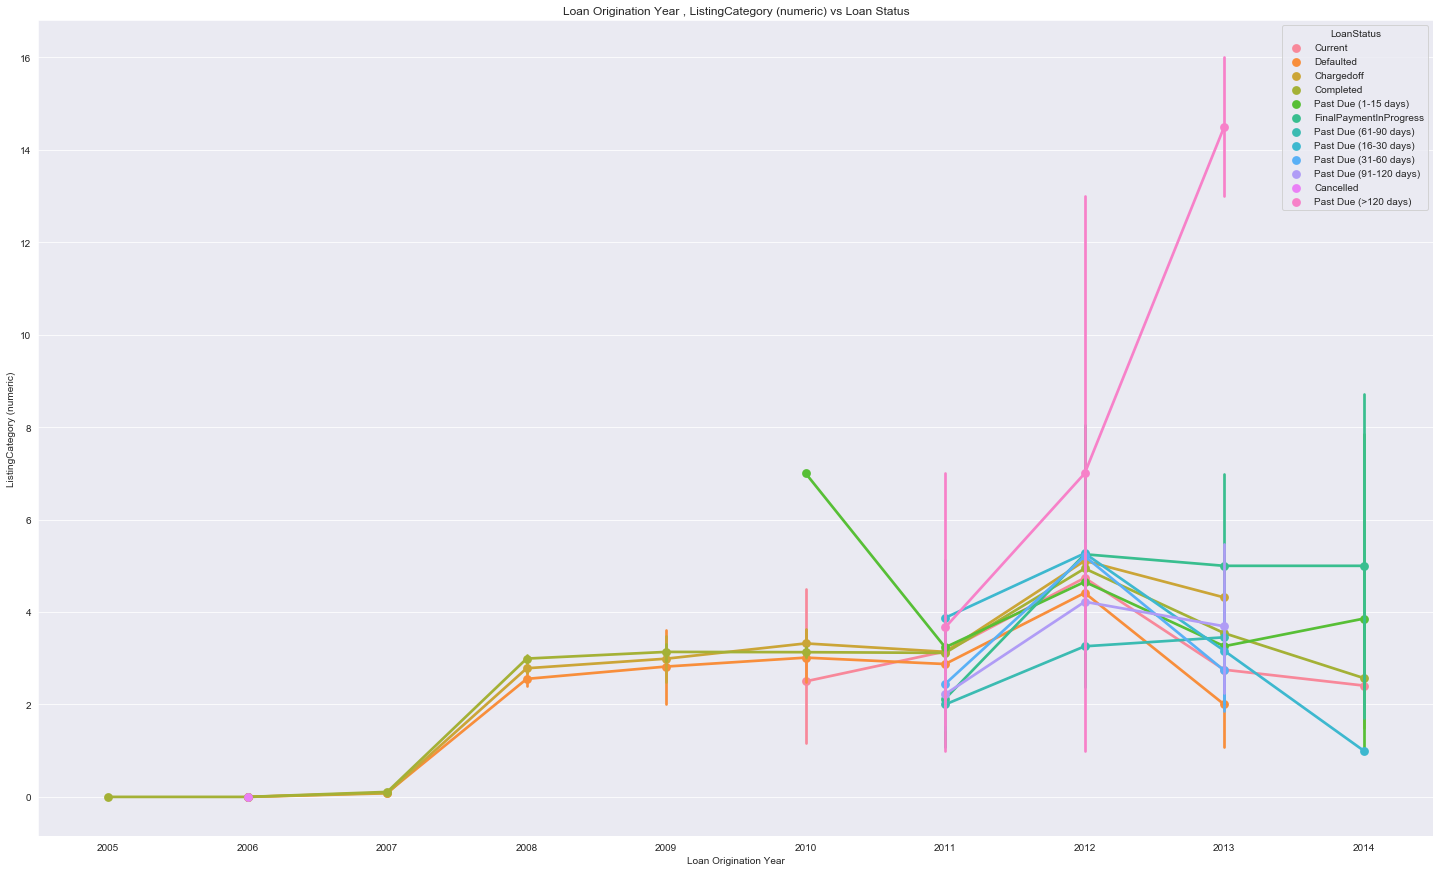

In [51]:

plt.figure(figsize = [25,15])
sn.pointplot(data = df_subset, x = 'OriginationYear', 
            y = 'ListingCategory (numeric)', hue = "LoanStatus");
plt.xlabel('Loan Origination Year')
plt.ylabel('ListingCategory (numeric)')

plt.title('Loan Origination Year , ListingCategory (numeric) vs Loan Status');

2013 is the year that has the highest Listing category and cancelled loan

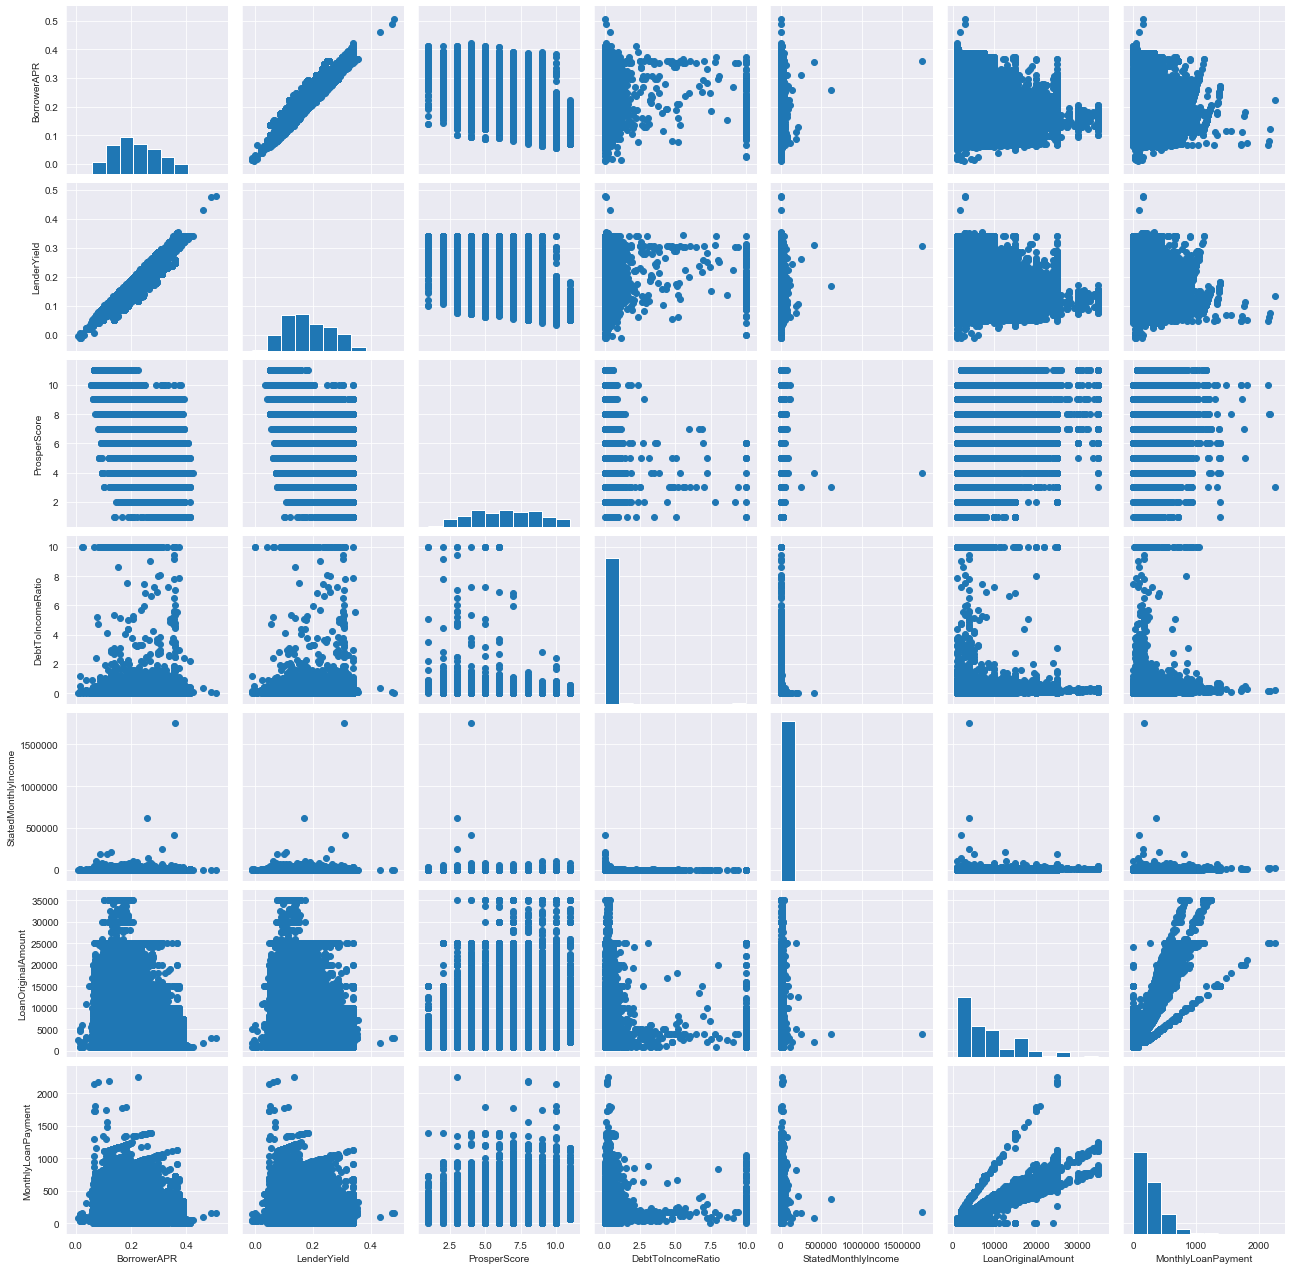

In [52]:
#Numerical Category Variables:

df2Num = ['BorrowerAPR', 'LenderYield', 'ProsperScore', 'DebtToIncomeRatio',
               'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']
ax = sn.PairGrid(data = df_subset , vars = df2Num);
ax = ax.map_offdiag(plt.scatter);
ax.map_diag(plt.hist);

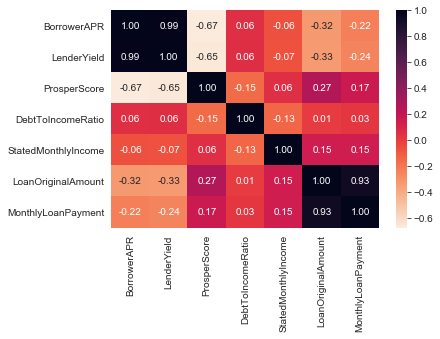

In [53]:

sn.heatmap(df_subset[df2Num].corr() , cmap = 'rocket_r' , annot =True , fmt = '.2f');

Looking at the plots above, there ia a negative relationship between the Loan Original amount and the Borrower APR. The ProsperScore and Borrower APR also have a negative relatiinship. The onl two that have the positive relationships are BorrowerAPR v.s LenderYield and Loan original amount v.s Monthly Loan Payment

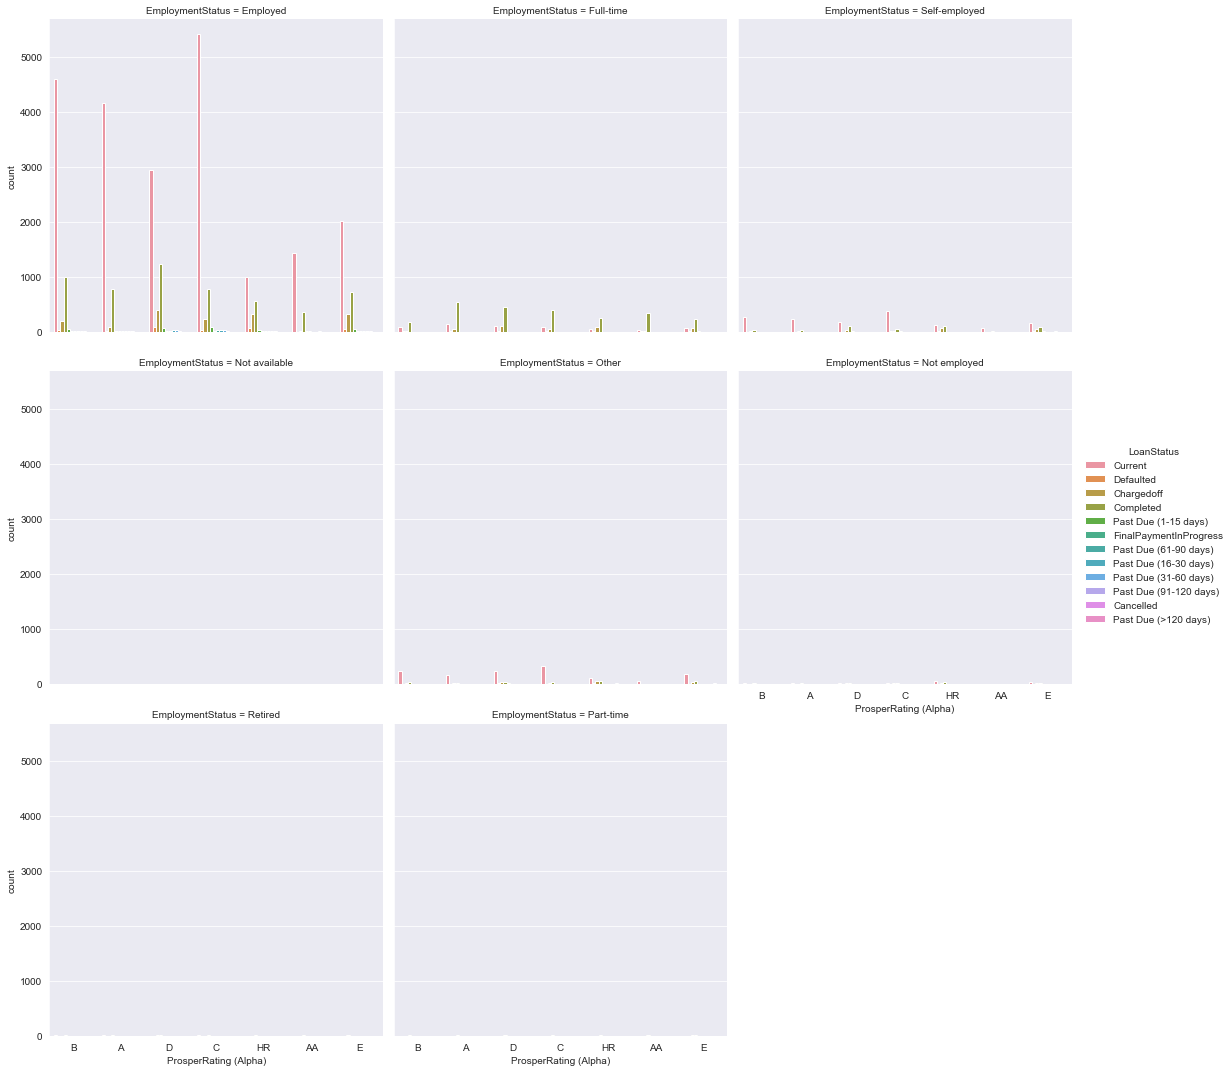

In [54]:
#3 Prosper Rating, Employment Status v.s Loan Status
sn.catplot(data = df_subset , x = 'ProsperRating (Alpha)', col = 'EmploymentStatus', hue = 'LoanStatus'
              , kind = 'count', col_wrap = 3);

The people who their employment Status are employed , they have the highest Prosper Rating

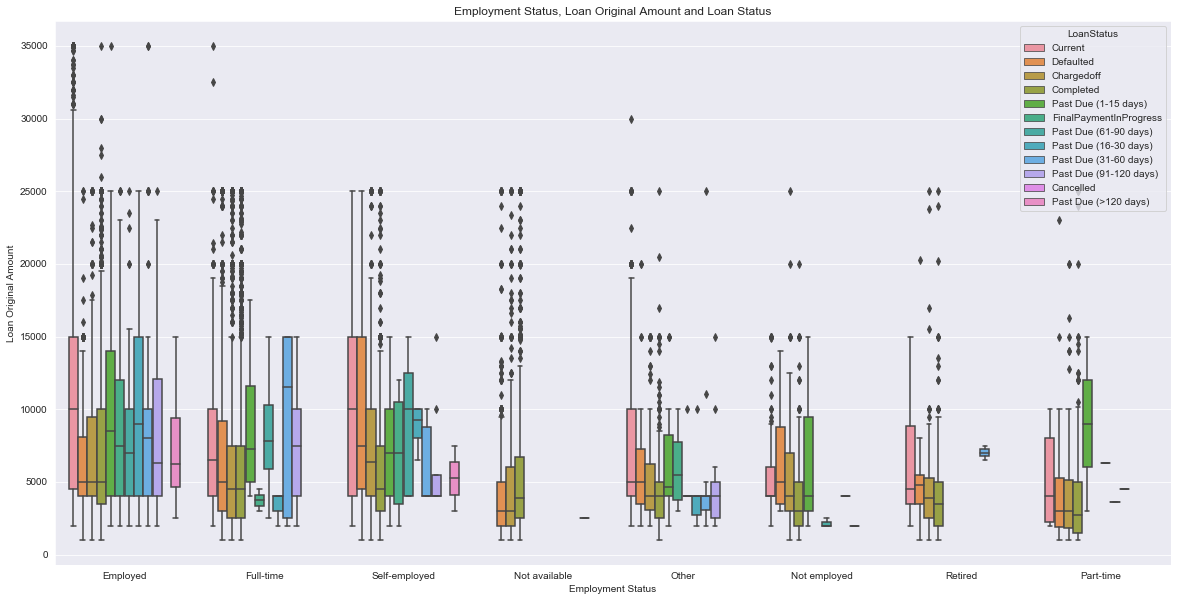

In [55]:
#4. Employment Status, Loan Original Amounts and Loan Status
plt.figure(figsize = [20,10])
sn.boxplot(data = df_subset, x = 'EmploymentStatus', 
            y = 'LoanOriginalAmount', hue = "LoanStatus");
plt.xlabel('Employment Status')
plt.ylabel('Loan Original Amount')

plt.title('Employment Status, Loan Original Amount and Loan Status');
plt.show();

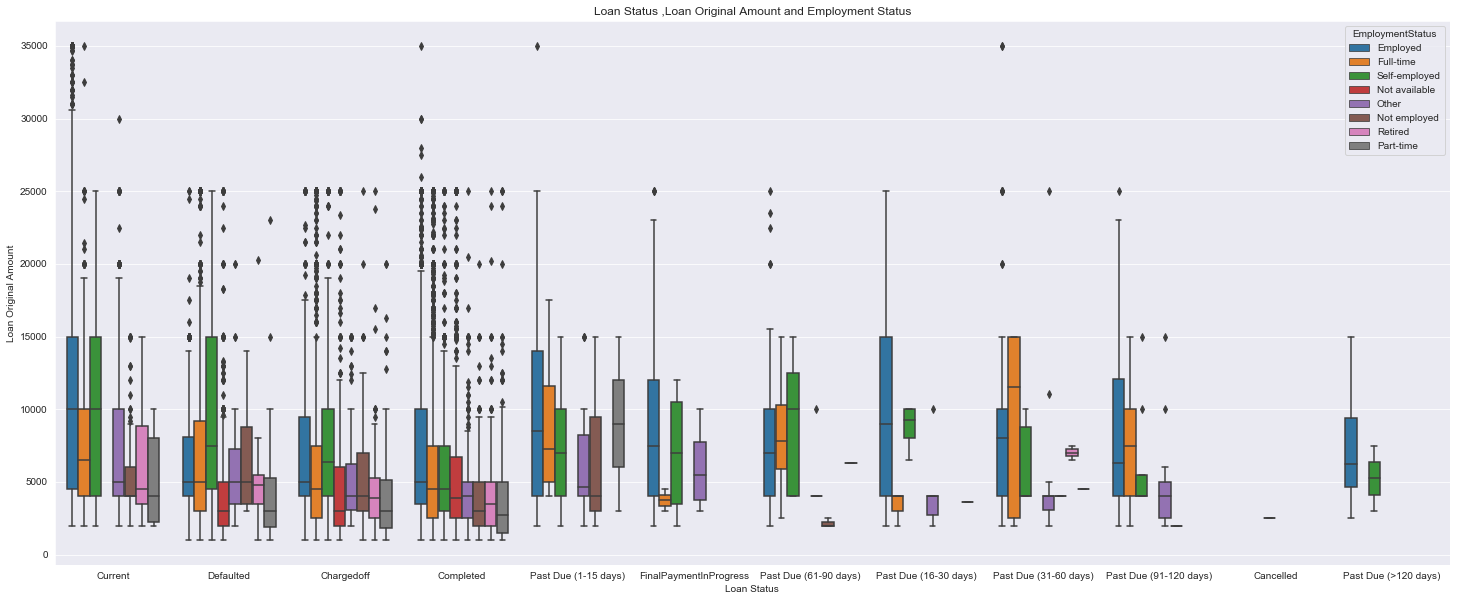

In [56]:
plt.figure(figsize = [25,10])
sn.boxplot(data = df_subset, x = 'LoanStatus', 
            y = 'LoanOriginalAmount', hue = "EmploymentStatus");
plt.xlabel('Loan Status')
plt.ylabel('Loan Original Amount')

plt.title('Loan Status ,Loan Original Amount and Employment Status');
plt.show()

Looking at the plots above, the Loan status with "completed" is the lowest along the oter Loan status. And the loan status with "Current" is the highest. The employment Status "employed" its loan amount is the highest along with other employemnt status. The employed and the self employed have the same amount of active current loan.

Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The borrower whose income is higher have higher prosper rating. The borrower whose income is lower or not employed have lower prosper rating. 


Were there any interesting or surprising interactions between features?

One of the interesting thing that I found in this investigation is that the people who are non-employed have the lowest Prosper Rating while those borrowers who are employed have the highest Prosper Rating as well as the completed loan and the current loan. In 2013, there were more cancelled loan.